In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from music_transcription.onset_detection.cnn_onset_detection import CnnOnsetDetector
from music_transcription.read_data import get_wav_and_truth_files
from music_transcription.tempo_detection.aubio_tempo_detection import AubioTempoDetector
from music_transcription.tempo_detection.simple_tempo_detection import SimpleTempoDetector

Using Theano backend.


In [2]:
# CONFIG
DATA_DIR = r'..\data'

onset_detector = CnnOnsetDetector.from_zip(
    '../models/onset_detection/20170627-3-channels_ds1-4_80-perc_adjusted-labels_with_config_thresh-0.05.zip')

aubio_tempo_detector = AubioTempoDetector()
simple_tempo_detector = SimpleTempoDetector()

In [3]:
active_datasets = {4}
wav_file_paths, truth_dataset_format_tuples = get_wav_and_truth_files(active_datasets)

D:\documents\FHNW\IP-6bb Verarbeitung von Instrumentaufnahmen\music-transcription\music_transcription\read_data.py:158: UserWarning: Skipping ..\data\IDMT-SMT-GUITAR_V2\dataset4\Career SG\fast\country_folk\audio\country_1_150BPM.wav, no truth csv found.
  warn('Skipping ' + path_to_wav + ', no truth csv found.')
D:\documents\FHNW\IP-6bb Verarbeitung von Instrumentaufnahmen\music-transcription\music_transcription\read_data.py:158: UserWarning: Skipping ..\data\IDMT-SMT-GUITAR_V2\dataset4\Career SG\fast\metal\audio\metal_3_135BPM.wav, no truth csv found.
  warn('Skipping ' + path_to_wav + ', no truth csv found.')
D:\documents\FHNW\IP-6bb Verarbeitung von Instrumentaufnahmen\music-transcription\music_transcription\read_data.py:158: UserWarning: Skipping ..\data\IDMT-SMT-GUITAR_V2\dataset4\Career SG\fast\rock_blues\audio\rock_1_120BPM.wav, no truth csv found.
  warn('Skipping ' + path_to_wav + ', no truth csv found.')
D:\documents\FHNW\IP-6bb Verarbeitung von Instrumentaufnahmen\music-tran

In [4]:
triples = []
for wav_path in wav_file_paths:
    filename = wav_path.split('\\').pop().split('BPM.')[0]
    bpmstr = filename.split('_').pop()
    bpm_truth = int(bpmstr)

    onset_times_seconds = onset_detector.predict_onsets(wav_path)

    bpm_aubio = aubio_tempo_detector.predict(wav_path, onset_times_seconds)
    bpm_onset_times = simple_tempo_detector.predict(wav_path, onset_times_seconds)
    triples.append((bpm_truth, bpm_aubio, bpm_onset_times))

triples.sort()
bpm_gt = []
bpm_a = []
bpm_o = []
for gt, a, o in triples:
    bpm_gt.append(gt)
    bpm_a.append(a)
    bpm_o.append(o)

In [5]:
print(bpm_gt)
print('')
print(bpm_a)
print('')
print(bpm_o)
print('')
gt = np.array(bpm_gt)
diff_a = np.array(bpm_a) - gt
diff_o = np.array(bpm_o) - gt
print(diff_a)
print('')
print(diff_o)
print('')
fact_a = np.array(bpm_a) / gt
fact_o = np.array(bpm_o) / gt
print(fact_a)
print('')
print(fact_o)
print('')

[50, 50, 50, 50, 50, 50, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 70, 70, 70, 70, 70, 75, 75, 75, 75, 75, 75, 78, 78, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 85, 85, 88, 88, 90, 90, 90, 90, 95, 95, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 115, 115, 115, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 125, 125, 125, 125, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 135, 140, 140, 140, 140, 140, 140, 140, 140, 140, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 170, 180, 180, 180, 1

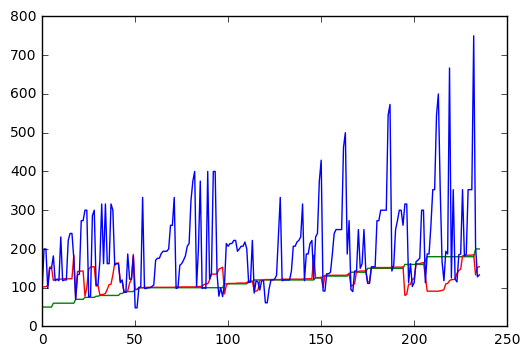

In [6]:
x_ax = range(len(bpm_gt))
plt.plot(x_ax, bpm_gt, '-g', x_ax, bpm_a, '-r', x_ax, bpm_o, '-b')
plt.show()

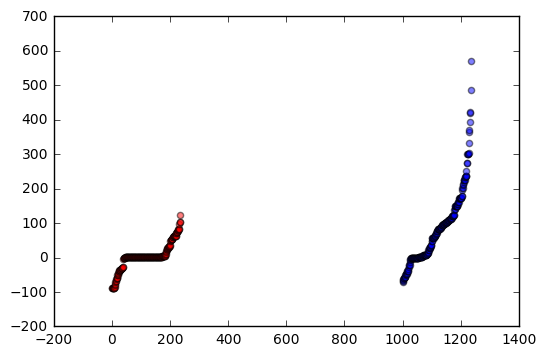

In [7]:
diff_a.sort()
diff_o.sort()

plt.figure()
plt.scatter(x_ax, diff_a, c='red', alpha=0.5)
plt.scatter(range(1000, 1000+len(bpm_gt)), diff_o, c='blue', alpha=0.5)
plt.show()

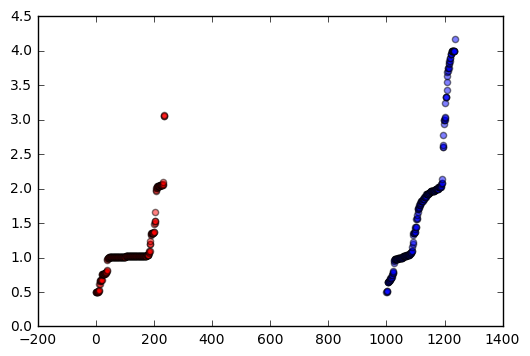

In [8]:
fact_a.sort()
fact_o.sort()

plt.figure()
plt.scatter(x_ax, fact_a, c='red', alpha=0.5)
plt.scatter(range(1000, 1000+len(bpm_gt)), fact_o, c='blue', alpha=0.5)
plt.show()

In [15]:
random.shuffle(diff_a)

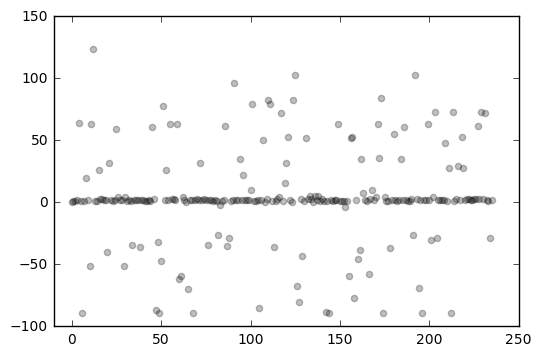

In [16]:
plt.figure()
plt.scatter(x_ax, diff_a, c='black', alpha=0.25)
plt.axis([-10, 250, -100, 150])
plt.show()

In [18]:
random.shuffle(fact_a)

In [76]:
from math import log2
print(log2(1), log2(2), log2(4), log2(8))
log2(3)%1

0.0 1.0 2.0 3.0


0.5849625007211561

In [77]:
clrs = []
for x in fact_a:
    r2x = round(2*x)
    f = 2*x / r2x
    
    no_multiple = (r2x > 1 and r2x%2 == 1) or log2(r2x)%1 != 0
    clrs.append('r' if f <= 0.95 or f >= 1.05 or no_multiple else 'g' if round(2*x) == 2 else 'y')
print(clrs.count('g'), clrs.count('y'),  clrs.count('r'))

143 37 56


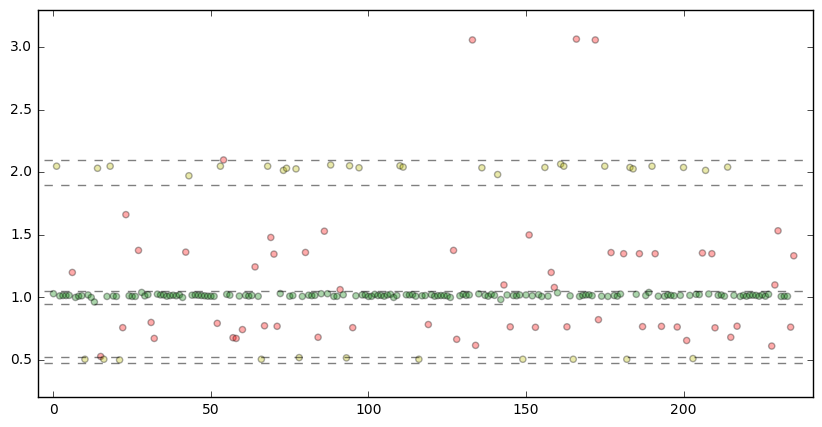

In [86]:
plt.figure(figsize=(10,5))
plt.plot([-3, 239], [2.1, 2.1], '--k', alpha=0.5)
plt.plot([-3, 239], [1.9, 1.9], '--k', alpha=0.5)
plt.plot([-3, 239], [1.05, 1.05], '--k', alpha=0.5)
plt.plot([-3, 239], [0.95, 0.95], '--k', alpha=0.5)
plt.plot([-3, 239], [0.525, 0.525], '--k', alpha=0.5)
plt.plot([-3, 239], [0.475, 0.475], '--k', alpha=0.5)
plt.scatter(x_ax, fact_a, c=clrs, alpha=0.33)
plt.axis([-5, 241, 0.2, 3.3])
plt.show()